In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [39]:
assets = pd.read_csv("asset_analysis2.csv")

In [40]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,Gps Source,Home Terminal Id,Id,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,EITHER_DEVICE,5874,1543227,341634C,MT,VE519894,NaN,ELD,False,False
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,EITHER_DEVICE,20137,1543230,NaN,CA,VE519392,0.0,ELD,False,False
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,EITHER_DEVICE,5824,1386999,65868KA,NY,VE510368,0.0,ELD,False,False
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,Unknown,3558,1471146,Blank,WI,VETEST,NaN,ELD,False,False
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,EITHER_DEVICE,1007,1769375,NaN,IL,2261,0.0,AOBRD,False,False


In [41]:
print(assets.dtypes)

Churn Status                object
Create time                 object
Churn                        int64
Deactivate number month     object
Difference in Days          object
Number of Records            int64
Time 1                     float64
Time                        object
Time 11                    float64
Reseller ID                  int64
Asset Type                  object
Change Date                 object
Change User                  int64
Create Date1                object
Create Date                 object
Create User                  int64
Deactivate                  object
Deactivate Month            object
Deactivated At              object
Deleted At                  object
Deleted Flag                 int64
Dvir Form Id               float64
Eld Connection Type         object
Eld Device                  object
Eld Device Name             object
Eld Mac Address             object
Firmware Version           float64
Gps Source                  object
Home Terminal Id    

In [42]:
assets.shape

(1544, 37)

In [43]:
import datetime

In [44]:
assets['Create Date1'] = pd.to_datetime(assets['Create Date1'])

In [45]:
print(assets.dtypes)

Churn Status                       object
Create time                        object
Churn                               int64
Deactivate number month            object
Difference in Days                 object
Number of Records                   int64
Time 1                            float64
Time                               object
Time 11                           float64
Reseller ID                         int64
Asset Type                         object
Change Date                        object
Change User                         int64
Create Date1               datetime64[ns]
Create Date                        object
Create User                         int64
Deactivate                         object
Deactivate Month                   object
Deactivated At                     object
Deleted At                         object
Deleted Flag                        int64
Dvir Form Id                      float64
Eld Connection Type                object
Eld Device                        

In [46]:
assets['StartDate'] = assets['Create Date1'].dt.date

In [47]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,Home Terminal Id,Id,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,5874,1543227,341634C,MT,VE519894,NaN,ELD,False,False,2018-07-06
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,20137,1543230,NaN,CA,VE519392,0.0,ELD,False,False,2018-07-06
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,5824,1386999,65868KA,NY,VE510368,0.0,ELD,False,False,2017-12-08
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,3558,1471146,Blank,WI,VETEST,NaN,ELD,False,False,2018-03-08
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,1007,1769375,NaN,IL,2261,0.0,AOBRD,False,False,2019-09-26


In [48]:
assets['Deactivate'] = pd.to_datetime(assets['Deactivate'])

In [49]:
assets['EndDate'] = assets['Deactivate'].dt.date

In [50]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,Id,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543227,341634C,MT,VE519894,NaN,ELD,False,False,2018-07-06,NaT
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543230,NaN,CA,VE519392,0.0,ELD,False,False,2018-07-06,NaT
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1386999,65868KA,NY,VE510368,0.0,ELD,False,False,2017-12-08,NaT
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1471146,Blank,WI,VETEST,NaN,ELD,False,False,2018-03-08,NaT
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,1769375,NaN,IL,2261,0.0,AOBRD,False,False,2019-09-26,NaT


assets['Churn'] = np.where(assets['deactivated_at'].isnull(),0,1)

In [51]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,Id,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543227,341634C,MT,VE519894,NaN,ELD,False,False,2018-07-06,NaT
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543230,NaN,CA,VE519392,0.0,ELD,False,False,2018-07-06,NaT
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1386999,65868KA,NY,VE510368,0.0,ELD,False,False,2017-12-08,NaT
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1471146,Blank,WI,VETEST,NaN,ELD,False,False,2018-03-08,NaT
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,1769375,NaN,IL,2261,0.0,AOBRD,False,False,2019-09-26,NaT


In [52]:
#users.to_csv("Cleaned_Users.csv")

In [53]:
from datetime import date

today = date.today()
print(today)


2019-12-01


In [54]:
assets['EndDate'] = assets['EndDate'].fillna(today)

In [55]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,Id,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543227,341634C,MT,VE519894,NaN,ELD,False,False,2018-07-06,2019-12-01
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1543230,NaN,CA,VE519392,0.0,ELD,False,False,2018-07-06,2019-12-01
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1386999,65868KA,NY,VE510368,0.0,ELD,False,False,2017-12-08,2019-12-01
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,1471146,Blank,WI,VETEST,NaN,ELD,False,False,2018-03-08,2019-12-01
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,1769375,NaN,IL,2261,0.0,AOBRD,False,False,2019-09-26,2019-12-01


In [56]:
assets['DurationInMonths'] = assets['EndDate'] - assets['StartDate']
assets['DurationInMonths'] = assets['DurationInMonths']/np.timedelta64(1,'M')

In [57]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,License Plate,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate,DurationInMonths
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,341634C,MT,VE519894,NaN,ELD,False,False,2018-07-06,2019-12-01,16.854556
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,NaN,CA,VE519392,0.0,ELD,False,False,2018-07-06,2019-12-01,16.854556
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,65868KA,NY,VE510368,0.0,ELD,False,False,2017-12-08,2019-12-01,23.754081
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,Blank,WI,VETEST,NaN,ELD,False,False,2018-03-08,2019-12-01,20.797142
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,NaN,IL,2261,0.0,AOBRD,False,False,2019-09-26,2019-12-01,2.168422


In [58]:
assets['DurationInMonths'].describe()

count    1544.000000
mean       21.221233
std         5.257383
min         0.000000
25%        20.829997
50%        23.754081
75%        23.754081
max        30.522187
Name: DurationInMonths, dtype: float64

In [59]:
assets['DurationRounded'] = assets['DurationInMonths'].round()

In [60]:
assets.tail()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate,DurationInMonths,DurationRounded
1539,Active,16:38:04.926+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,VA,VE510291,0.0,ELD,False,False,2017-12-08,2019-12-01,23.754081,24.0
1540,Active,05:58:52.608+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249628,...,IL,52,0.0,AOBRD,False,False,2017-12-19,2019-12-01,23.392677,23.0
1541,Active,16:39:32.64+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,NaN,1344,0.0,AOBRD,False,False,2017-10-16,2019-12-01,25.495390,25.0
1542,Active,21:49:00.333+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,IL,1492,0.0,AOBRD,False,False,2019-04-22,2019-12-01,7.326639,7.0
1543,Active,17:09:58.35+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,IL,1498,0.0,AOBRD,False,False,2018-05-04,2019-12-01,18.924413,19.0


In [61]:
#users.to_csv("Cleaned_Data_1.csv")

In [62]:
assets['DurationRounded'] = assets['DurationRounded'].astype('int64')

In [63]:
print(assets.dtypes)

Churn Status                       object
Create time                        object
Churn                               int64
Deactivate number month            object
Difference in Days                 object
Number of Records                   int64
Time 1                            float64
Time                               object
Time 11                           float64
Reseller ID                         int64
Asset Type                         object
Change Date                        object
Change User                         int64
Create Date1               datetime64[ns]
Create Date                        object
Create User                         int64
Deactivate                 datetime64[ns]
Deactivate Month                   object
Deactivated At                     object
Deleted At                         object
Deleted Flag                        int64
Dvir Form Id                      float64
Eld Connection Type                object
Eld Device                        

In [64]:
assets.head()

,Churn Status,Create time,Churn,Deactivate number month,Difference in Days,Number of Records,Time 1,Time,Time 11,Reseller ID,...,License Plate State,Name,Odometer Offset Km,Regulation Mode,Use Gps Odometer,Use Manual Engine Hours,StartDate,EndDate,DurationInMonths,DurationRounded
0,Active,18:05:13.457+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,MT,VE519894,NaN,ELD,False,False,2018-07-06,2019-12-01,16.854556,17
1,Active,18:16:03.193+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,CA,VE519392,0.0,ELD,False,False,2018-07-06,2019-12-01,16.854556,17
2,Active,16:38:10.22+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,NY,VE510368,0.0,ELD,False,False,2017-12-08,2019-12-01,23.754081,24
3,Active,18:26:05.762+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1251368,...,WI,VETEST,NaN,ELD,False,False,2018-03-08,2019-12-01,20.797142,21
4,Active,20:50:34.642+00,0,#VALUE!,#NUM!,1,0.0,NaN,0.0,1249235,...,IL,2261,0.0,AOBRD,False,False,2019-09-26,2019-12-01,2.168422,2


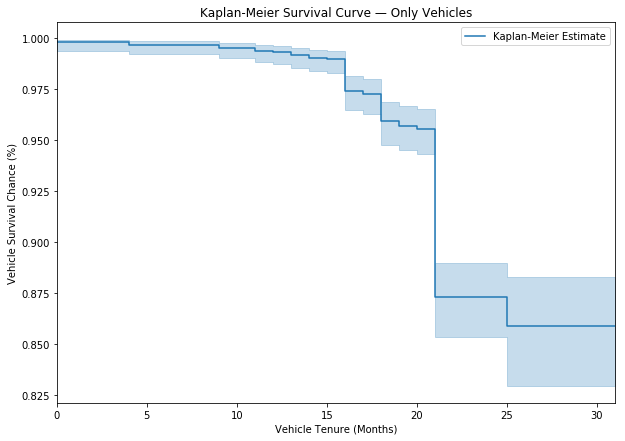

In [66]:

from lifelines import KaplanMeierFitter
# fitting kmf to churn data
duration = assets['DurationRounded'].values
churn = assets['Churn'].values
kmf = KaplanMeierFitter()
kmf.fit(duration, event_observed=churn, label='Kaplan-Meier Estimate')

#kmf.plot(ci_show=False)

# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — Only Vehicles')
ax.set_xlabel('Vehicle Tenure (Months)')
ax.set_ylabel('Vehicle Survival Chance (%)')
plt.show()

In [3]:
#users = pd.read_csv("Cleaned_Data_1.csv")

In [67]:
assets['Reseller ID'].unique()

array([1251368, 1249235, 1249628], dtype=int64)

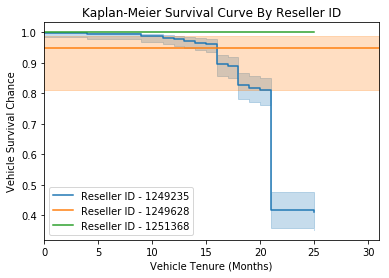

In [68]:
from lifelines import KaplanMeierFitter
kmf1 = KaplanMeierFitter()

T = assets['DurationRounded']     ## time to event
E = assets['Churn']      ## event occurred or censored

groups = assets['Reseller ID']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 1249235)   ## Cohort 1
ix2 = (groups == 1249628)         ## Cohort 2
ix3 = (groups == 1251368)         ## Cohort 3

kmf1.fit(T[ix1], E[ix1], label='Reseller ID - 1249235')    ## fit the cohort 1 data
ax = kmf1.plot()


kmf1.fit(T[ix2], E[ix2], label='Reseller ID - 1249628')         ## fit the cohort 2 data
ax1 = kmf1.plot(ax=ax)


kmf1.fit(T[ix3], E[ix3], label='Reseller ID - 1251368')        ## fit the cohort 3 data
kmf1.plot(ax=ax1)                               ## Plot the KM curve for three cohort on same x and y axis

# plotting kmf curve
#fig, ax = plt.subplots(figsize=(10,7))
#kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve By Reseller ID')
ax.set_xlabel('Vehicle Tenure (Months)')
ax.set_ylabel('Vehicle Survival Chance')
#plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.show()

In [18]:
print(users.dtypes)

Unnamed: 0                   int64
id                           int64
account_id                   int64
password                    object
create_user                  int64
create_date                 object
change_user                float64
change_date                 object
verified                    object
verification_token          object
salt                        object
eula_accepted_date          object
db_user                     object
db_password                 object
verification_token_date     object
home_terminal_id           float64
system                      object
deactivated_at              object
alias                       object
suffix                      object
deleted_at                  object
subset_id                  float64
enabled_features            object
StartDate                   object
EndDate                     object
Churn                        int64
DurationInMonths           float64
DurationRounded            float64
dtype: object


In [24]:
users.head()

,Unnamed: 0,id,account_id,password,create_user,create_date,change_user,change_date,verified,salt,...,alias,suffix,deleted_at,subset_id,enabled_features,StartDate,EndDate,Churn,DurationInMonths,DurationRounded
0,0,1508119,1249235,8001e6157bb342211905c9cf7b211626c6d508e7,1333652,2019-08-14 14:29:26.419000+00:00,1396634.0,2019-09-16 20:22:04.557+00,t,f83f994743d54abc9ae32a83830e84b7,...,1700,NaN,NaN,599.0,DVIR,2019-08-14,2019-09-16,1,1.084211,1.0
1,1,1508120,1249235,7ca573aa8ee5e97a8fe63878ba164e1c499d8741,1333652,2019-08-14 14:32:00.782000+00:00,1396634.0,2019-09-16 20:20:08.054+00,t,69147945b0b34e1a8ece1759322ea1ed,...,0226,NaN,NaN,599.0,DVIR,2019-08-14,2019-09-16,1,1.084211,1.0
2,2,1452970,1249235,4340e84de6a8b8ab44a285073b3d5aa70b4eca1a,1333652,2019-02-19 20:59:05.210000+00:00,1252901.0,2019-09-23 13:27:34.845+00,t,353c3e4527b748cba992a517c42957cc,...,6964,NaN,NaN,599.0,"ELD,DVIR",2019-02-19,2019-11-24,0,9.133658,9.0
3,3,1508123,1249235,f30e15f7124abf241b8c863554e934bedadcc45d,1333652,2019-08-14 14:36:12.096000+00:00,1396634.0,2019-09-13 21:02:16.665+00,t,8927338f60ba46aa9b917dc5704558ec,...,4424,NaN,NaN,599.0,DVIR,2019-08-14,2019-09-13,1,0.985647,1.0
4,4,1508125,1249235,93536428fe19b78803b0fc2d9cfa12be96e70239,1333652,2019-08-14 14:39:19.680000+00:00,1315324.0,2019-09-20 22:57:54.41+00,t,807f6391611740ea97e8aa2b9e5c311b,...,3214,NaN,NaN,599.0,ELD,2019-08-14,2019-11-24,0,3.351198,3.0


In [22]:
from lifelines import CoxPHFitter
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(users, 'DurationRounded', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

ValueError: could not convert string to float: '684cd647e9901ddd2b2be427815fb6e8e8e8181b'